# The Vendor Problem

## Background

We use the generic title "Vendor Problem" to refer to the classic [newsvendor problem or newsvendor model](https://en.wikipedia.org/wiki/Newsvendor_model). Vendor problems are straightforward examples of two stage decision problems where a decision must be made "here and now" to purchase a perishable items that will be resold later in a market with uncertain demand. If the vendor buys too much then there will be leftover goods sold for salvage value. But buy too little and the vendor leaves "money on the table." The problem is to determine an order size that balances the vendor's economic risk and reward.

The vendor problem appears in a wide range of applications including in media at [Time Magazine](https://pubsonline.informs.org/doi/abs/10.1287/inte.33.3.72.16010?journalCode=inte) and the [Yedioth Group](https://pubsonline.informs.org/doi/abs/10.1287/inte.2014.0759?journalCode=inte), manufacturing at [Intel](https://pubsonline.informs.org/doi/abs/10.1287/inte.1070.0339?journalCode=inte) and [Hitachi](https://pubsonline.informs.org/doi/abs/10.1287/inte.1070.0299?journalCode=inte), [supply chain optimization in online fashion e-commerce](https://arxiv.org/pdf/2007.02510.pdf), and [recycling/remanufacturing operations](https://econpapers.repec.org/bookchap/sprisochp/978-1-4614-3600-3_5f10.htm).

Recent reviews of the vendor problem can be found in the following publications.

* Petruzzi, N. C., & Dada, M. (1999). Pricing and the newsvendor problem: A review with extensions. Operations research, 47(2), 183-194. [doi](https://pubsonline.informs.org/doi/10.1287/opre.47.2.183)

* Qin, Y., Wang, R., Vakharia, A. J., Chen, Y., & Seref, M. M. (2011). The newsvendor problem: Review and directions for future research. European Journal of Operational Research, 213(2), 361-374. [doi](https://doi.org/10.1016/j.ejor.2010.11.024)

* Choi, T. M. (Ed.). (2012). Handbook of Newsvendor problems: Models, extensions and applications (Vol. 176). Springer Science & Business Media. [Springer](https://link.springer.com/book/10.1007/978-1-4614-3600-3)

Daily life is replete with examples of the vendor problem. Stop a moment and think of a few before moving on.

## Problem Data

The vendor needs to decide how much inventory to order here and now to fulfill an uncertain future demand. The data includes the vendor's purchase cost $c$, the vendor's selling price $r$, and salvage/waste value $w$. The problem has meaning when these prices satisfy relationships

$$ r \geq c \geq w$$

The difference $(r - c)$ is the net profit earned per unit when there is sufficient customer demand, $(c - w)$ is the loss per unit for goods sold as waste or salvage. 

Consider, for example, a food truck that sells a single menu item at a price of 5&euro; for which the cost is 2&euro; per item sold, and could be sold out at discounted price of 1.25&euro; if demand is not sufficient at the original price. 

| | Symbol | Value |
| :-- | :--: | :--: |
| Retail price | $r$ | 5.00 | 
| Purchase cost | $c$ | 2.00 |
| Waste/Salvage value | $w$ | 1.25 |

In [5]:
# vendor parameter values
r = 5
c = 2
w = 1.25

## Demand Scenarios

The first case we consider is a probabilistic demand forecast specified as a short list of scenarios.

| Scenario <br> $s$ | Probability <br> $p_s$ | Demand <br> $D_s$ |
| :--: | :--: | :--: |
| A | 0.6 | 200 |
| B | 0.3 | 100 |
| C | 0.1 | 250 |

In [6]:
import numpy as np
import pandas as pd

scenarios = pd.DataFrame({
    "A": {"probability": 0.6, "demand": 200},
    "B": {"probability": 0.3, "demand": 100},
    "C": {"probability": 0.1, "demand": 250},
}).T

display(scenarios)

,probability,demand
A,0.6,200.0
B,0.3,100.0
C,0.1,250.0


## Preliminary Calculations

### Expected Value with Perfect Information (EV|PI)

Imagine a situation where one could forecast future demand perfectly. Then for each scenario $s \in S$, the order size would match demand $D_s$ producing a net profit $(r - c)D_s$ with probability $p_s$. The computing expected value then gives the **expected value of perfect information (EV|PI)**

$$
\begin{align*}
\mathbb{E}[P|PI] & = \sum_{s\in S} p_s (r-c) D_s \\
& = (r - c) \sum_{s\in S} p_s D_s \\
\\
\implies \mathbb{E}[P|PI] & = (r - c) \mathbb{E}[D] \\
\end{align*}
$$

EVPI establishes an upper bound on the expected return.

In [7]:
evpi = (r - c) * sum(scenarios["probability"] * scenarios["demand"])
print(f"Expected Value of Perfect Information = {evpi:0.2f}")

Expected Value of Perfect Information = 525.00


### Computing the Expected Value for fixed Order Size

The key characteristic of the newsvendor problem is that one determines the order size $x$ without advance knowledge of which scenario will transpire. For scenarios $s\in S$, the number of units sold at retail value is given by the smaller of the order size and demand.

$$
\begin{align*}
y_s & = \min(x, D_s)\\
\end{align*}
$$

The salvage is the left over amount $x - y_s$ which be non-negative. The expected profit is then

$$
\begin{align*}
\mathbb{E}[P|x] & = \sum_{s\in S} p_s \left[ (r-c) y_s - (c - w) (x - y_s) \right] \\
& = \sum_{s\in S} p_s \left[ (r-c) y_s + (c - w) y_s - (c - w) x \right] \\
& = \sum_{s\in S} p_s \left[ (r-w) y_s - (c - w) x \right] \\
& = (r - w) \sum_{s\in S} p_s y_s  - (c - w) x \\
\\
\implies \mathbb{E}[P|x] & = (r - w) \mathbb{E}[y] - (c - w) x \\
\\
\implies \mathbb{E}[P|x] & = (r - w) \mathbb{E}[\min(x, D)] - (c - w) x \\
\end{align*}
$$

In [8]:
def expected_profit(x, scenarios):
    D = scenarios["demand"]
    p = scenarios["probability"]
    y = np.minimum(x, D)    
    return  (r - w)*sum(p*y) - (c - w)*x

### Expected Value of the Mean Demand

A common answer to the question of how much to order is to order the expected demand. 

$$\bar{D} = \mathbb{E}[D] = \sum_{s\in S} p_s D_s$$

The is call the **expected value for the mean demand (EV|MD)** which

$$\mathbb{E}[P|x = \bar{D}] = (r - w) \mathbb{E}[\min(\bar{D}, D)] - (c - w) \bar{D} $$

In [9]:
D = sum(scenarios["probability"] * scenarios["demand"])
print(f"mean demand = {D}")

evmd = expected_profit(D, scenarios)
print(f"expected profit for the mean demand = {evmd}")

mean demand = 175.0
expected profit for the mean demand = 440.625


## Maximizing the Expected Value

The objective is to maximize expected profit. Let's plot the expected value as a function of the decision variable $x$.

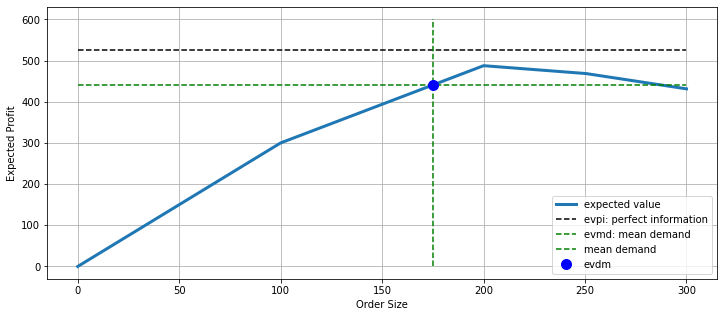

In [37]:
import matplotlib.pyplot as plt

def vendor_plot(r, c, w, scenarios):
    x = np.linspace(0, 1.2 * scenarios["demand"].max(), 1000)
    ev = [expected_profit(x, scenarios) for x in x]

    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.plot(x, ev, lw=3, label="expected value")
    ax.plot([0, 300], [evpi, evpi], 'k--', label="evpi: perfect information")
    ax.plot([0, 300], [evmd, evmd], 'g--', label="evmd: mean demand")
    ax.plot([D, D], [0, 600], 'g--', label="mean demand")
    ax.set_xlabel("Order Size")
    ax.set_ylabel("Expected Profit")
    ax.grid(True)
    ax.legend()
    return ax

ax = vendor_plot(r, c, w, scenarios);
ax.plot(D, evmd, 'b.', ms=20, label="evdm")
ax.legend()

## Pyomo Model for the Stochastic Solution

An optimization model to find the maximum expected value can be constructed from the following formulation.

$$
\begin{align*}
\max_{x \geq 0, y_s\geq 0}\; & \mathbb{E}[P] = \sum_{s\in S} p_s P_s \\
\\
\text{s.t.}\quad & P_s = \left[ (r-w) y_s - (c - w) x \right] & \forall s\in S \\
& y_s \leq x & \forall s\in S\\
& y_s \leq D_s & \forall s\in S\\
\end{align*}
$$

We include the profit for each scenario, $P_s$,  in the model formulation to investigate the economic risk associated with solutions to this model.

In [13]:
import pyomo.environ as pyo

def vendor_model(r, c, w, scenarios):
    
    m = pyo.ConcreteModel()

    # price parameters
    m.r = pyo.Param(domain=pyo.NonNegativeReals, initialize=r)
    m.c = pyo.Param(domain=pyo.NonNegativeReals, initialize=c)
    m.w = pyo.Param(domain=pyo.NonNegativeReals, initialize=w)

    assert m.c <= m.r
    assert m.w <= m.c

    # scenario information
    m.S = pyo.Set(initialize=scenarios.index)
    m.d = pyo.Param(m.S, initialize=scenarios["demand"])
    m.p = pyo.Param(m.S, initialize=scenarios["probability"])

    assert abs(sum(m.p[s] for s in m.S) - 1) <= 0.0001

    # decision variables
    m.x = pyo.Var(domain=pyo.NonNegativeReals)
    m.y = pyo.Var(m.S, domain=pyo.NonNegativeReals)

    # Expression for profit
    @m.Expression(m.S)
    def profit(m, s):
        return (m.r - m.w)*m.y[s] - (m.c - m.w)*m.x

    # Objective
    @m.Objective(sense=pyo.maximize)
    def expected_profit_obj(m):
        return sum(m.p[s] * m.profit[s] for s in m.S)

    @m.Constraint(m.S)
    def demand_bound(m, s):
        return m.y[s] <= m.d[s]

    @m.Constraint(m.S)
    def sales_bound(m, s):
        return m.y[s] <= m.x

    pyo.SolverFactory('cbc').solve(m)
    
    return m

m = vendor_model(r, c, w, scenarios)
m.expected_profit_obj.display()
m.x.display()
m.y.display()


expected_profit_obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 487.5
x : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 : 200.0 :  None : False : False : NonNegativeReals
y : Size=3, Index=S
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      A :     0 : 200.0 :  None : False : False : NonNegativeReals
      B :     0 : 100.0 :  None : False : False : NonNegativeReals
      C :     0 : 200.0 :  None : False : False : NonNegativeReals


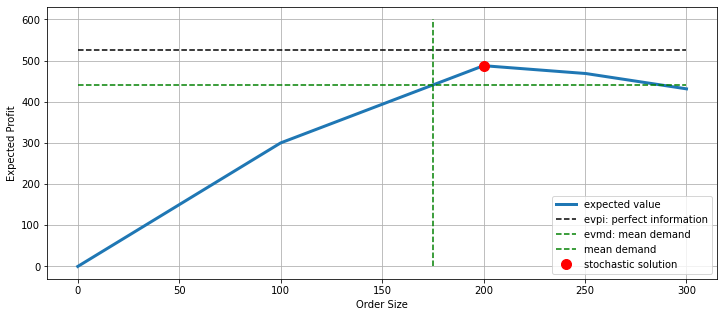

In [14]:
ax = vendor_plot(r, c, w, scenarios)
ax.plot(m.x(), m.expected_profit_obj(), 'r.', ms=20, label="stochastic solution")
ax.legend()

## Analytical Solution

Virtually every two-stage stochastic programs will require a numerical solution using an optimization code. The newsvendor problem, however, is amenable to analytical solution which is included here for the great insight that it gives into the relationship between economic return, risk, and demand forecasting.

### Maximum Expected Value for Continuous Distributions

The case of continuous distributions can be handled analytically with basic calculus. Let $p(D)$ be the continuous probability density function for demand.

$$
\begin{align*}
\mathbb{E}[P|x] & = (r - w) \mathbb{E}[\min(x, D)] - (c - w) x \\
& = (r - w)\int_0^\infty p(D) \min(x, D)\,dD - (c - w)x \\
\end{align*}
$$

The integral can be broken into two domains $[0, x)$ and $[x, \infty)$

$$
\begin{align*}
\mathbb{E}[P|x] & = (r - w)\int_0^x p(D) D\,dD + (r - w) x \int_x^\infty p(D) \,dD - (c - w)x 
\end{align*}
$$

The unconstrained maximum is found by finding values $x$ for the which the first derivative evaluates to zero.

$$
\begin{align*}
\left.\frac{\partial \mathbb{E}[P|x]}{\partial x}\right|_{x^{opt}} & = (r - w) p(x) + (r - w)\int_x^\infty p(D) \,dD - (r - w) x p(x) - (c - w) = 0 \\
\end{align*}
$$

which reduces to

$$
\begin{align*}
(r - w) \int_{x^{opt}}^\infty p(D) \,dD - (c - w) & = 0
\end{align*}
$$

$F(x) = \int_0^x p(D)\,dD$ is the cumulative distribution function. solving for a root

$$
\begin{align*}
(r - w)(1 - F(x^{opt})) - (c - w) & = 0 \\
(r - c) & = (r - w) F(x^{opt}) \\
\\
\implies x^{opt} = F^{-1}\left(\frac{r-c}{r-w}\right)
\end{align*}
$$

where $x = F^{-1}(q)$ is the quantile function that returns the value of a random variable associated with the $q^{th}$ quantile of the cumulative distribution function where $q = F(x)$

## Discrete Distribution

Let's apply the continuous probability analysis to the discrete case. We first compute the quantile $q = \frac{r-c}{r-w}$

In [15]:
q = (r - c)/(r - w)
print(f"quantile = {q}")

quantile = 0.8


Next we compute the cumulative distribution function.

,probability,demand,cdf
B,0.3,100.0,0.3
A,0.6,200.0,0.9
C,0.1,250.0,1.0


optimal order = 200.0


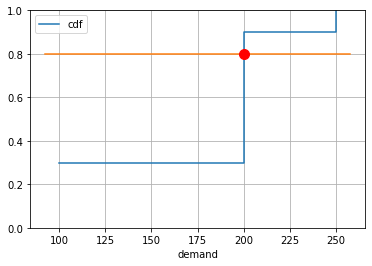

In [16]:
# compute the cumulative distribution function
scenarios = scenarios.sort_values("demand")
scenarios["cdf"] = scenarios["probability"].cumsum()
display(scenarios)

# plot and look up the optimal order size
ax = scenarios.plot(x="demand", y="cdf", drawstyle="steps-post", grid=True)
ax.plot(ax.get_xlim(), [q, q])
ax.set_ylim(0, 1)

from scipy.interpolate import interp1d
Finv = interp1d(np.array(scenarios["cdf"]), np.array(scenarios["demand"]), kind="next")
ax.plot(Finv(q), q, 'r.', ms=20)
print(f"optimal order = {Finv(q):0.1f}")

## Managing Risk

Up to this point the objective has been to maximize expected value without regard to any associated financial risk. This is a suitable objective for a risk neutral vendor. Most private businesses, however, avoid downside risk even at the cost of reducing expected return. 

The following chart shows the profit earned for each scenario when the objective is to maximize expected profit.

,probability,demand,cdf,profit
A,0.6,200.0,0.9,600.0
B,0.3,100.0,0.3,225.0
C,0.1,250.0,1.0,600.0


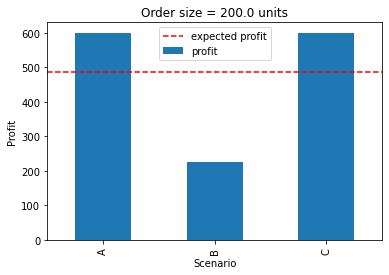

In [42]:
scenarios["profit"] = [m.profit[s].expr() for s in scenarios.index]
scenarios.sort_index(inplace=True)
display(scenarios)
ax = scenarios["profit"].plot(kind="bar", 
                              ylabel="Profit", 
                              xlabel="Scenario",
                              title=f"Order size = {m.x()} units")
ax.plot(ax.get_xlim(), [m.expected_profit_obj()]*2, 'r--', label="expected profit")
ax.legend()

## Maximizing Worst-Case Profit

In [44]:
import pyomo.environ as pyo

def vendor_model_worst_case(r, c, w, scenarios):
    
    m = pyo.ConcreteModel()

    # price parameters
    m.r = pyo.Param(domain=pyo.NonNegativeReals, initialize=r)
    m.c = pyo.Param(domain=pyo.NonNegativeReals, initialize=c)
    m.w = pyo.Param(domain=pyo.NonNegativeReals, initialize=w)

    assert m.c <= m.r
    assert m.w <= m.c

    # scenario information
    m.S = pyo.Set(initialize=scenarios.index)
    m.d = pyo.Param(m.S, initialize=scenarios["demand"])
    m.p = pyo.Param(m.S, initialize=scenarios["probability"])

    assert abs(sum(m.p[s] for s in m.S) - 1) <= 0.0001

    # decision variables
    m.x = pyo.Var(domain=pyo.NonNegativeReals)
    m.y = pyo.Var(m.S, domain=pyo.NonNegativeReals)
    m.wc = pyo.Var()

    # Expression for profit
    @m.Expression(m.S)
    def profit(m, s):
        return (m.r - m.w)*m.y[s] - (m.c - m.w)*m.x

    @m.Constraint(m.S)
    def worst_case(m, s):
        return m.wc <= m.profit[s]
    
    @m.Objective(sense=pyo.maximize)
    def worst_case_profit(m):
        return m.wc

    @m.Constraint(m.S)
    def demand_bound(m, s):
        return m.y[s] <= m.d[s]

    @m.Constraint(m.S)
    def sales_bound(m, s):
        return m.y[s] <= m.x

    pyo.SolverFactory('cbc').solve(m)
    
    return m

m = vendor_model_worst_case(r, c, w, scenarios)
m.worst_case_profit.display()
m.x.display()
m.y.display()


worst_case_profit : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 300.0
x : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 : 100.0 :  None : False : False : NonNegativeReals
y : Size=3, Index=S
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      A :     0 : 100.0 :  None : False : False : NonNegativeReals
      B :     0 : 100.0 :  None : False : False : NonNegativeReals
      C :     0 : 100.0 :  None : False : False : NonNegativeReals


<AxesSubplot:>

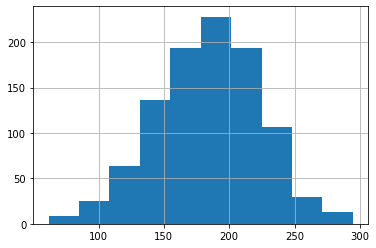

In [17]:
N = 1000

demand_history = pd.DataFrame()
demand_history["demand"] = 200*np.random.weibull(5, N)
demand_history["probability"] = 1/N
demand_history["demand"].hist(bins=10)

<AxesSubplot:xlabel='Order Size', ylabel='Expected Profit'>

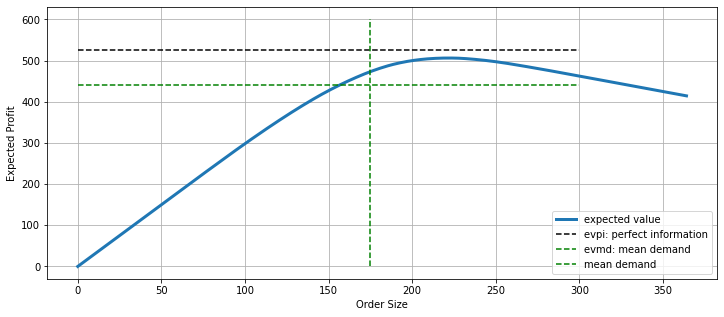

In [56]:
m = vendor(r, c, w, demand_history)
vendor_plot(r, c, w, demand_history)

## Distribution of Outcomes

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

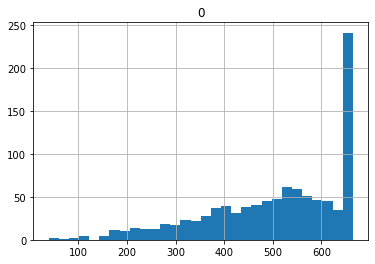

In [58]:
pd.DataFrame([m.profit[s].expr() for s in m.S], index=m.S).hist(bins=30)

In [63]:
import pyomo.environ as pyo

def vendor_model_var(r, c, w, scenarios):

    
    m = pyo.ConcreteModel()

    # price parameters
    m.r = pyo.Param(domain=pyo.NonNegativeReals, initialize=r)
    m.c = pyo.Param(domain=pyo.NonNegativeReals, initialize=c)
    m.w = pyo.Param(domain=pyo.NonNegativeReals, initialize=w)

    assert m.c <= m.r
    assert m.w <= m.c

    # scenario information
    m.S = pyo.Set(initialize=scenarios.index)
    m.d = pyo.Param(m.S, initialize=scenarios["demand"])
    m.p = pyo.Param(m.S, initialize=scenarios["probability"])

    assert abs(sum(m.p[s] for s in m.S) - 1) <= 0.001

    # decision variables
    m.x = pyo.Var(domain=pyo.NonNegativeReals)
    m.y = pyo.Var(m.S, domain=pyo.NonNegativeReals)

    # Expression for profit
    @m.Expression(m.S)
    def profit(m, s):
        return (m.r - m.w)*m.y[s] - (m.c - m.w)*m.x

    # Objective
    @m.Objective(sense=pyo.maximize)
    def expected_profit_obj(m):
        return sum(m.p[s] * m.profit[s] for s in m.S)

    @m.Constraint(m.S)
    def demand_bound(m, s):
        return m.y[s] <= m.d[s]

    @m.Constraint(m.S)
    def sales_bound(m, s):
        return m.y[s] <= m.x

    pyo.SolverFactory('cbc').solve(m)
    
    return m
    
m = vendor_model_var(r, c, w, demand_history)

m.x.display()


x : Size=1, Index=None
    Key  : Lower : Value    : Upper : Fixed : Stale : Domain
    None :     0 : 221.6258 :  None : False : False : NonNegativeReals
